# Solver = lbfgs, default

In [1]:
import numpy as np
import pandas as pd
from math import ceil
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score,recall_score,f1_score, accuracy_score,confusion_matrix,classification_report

In [2]:
X_train_df = pd.read_csv("X_train.csv")
y_train_df = pd.read_csv("y_train.csv")
X_test_df = pd.read_csv("X_test.csv")
y_test_df = pd.read_csv("y_test.csv")

X_train = X_train_df.values
X_test = X_test_df.values
y_train = y_train_df["Severity"]
y_test = y_test_df["Severity"]

In [5]:
# Initialize the Logistic Regression model with adjusted hyperparameters
logreg_lbfgs = LogisticRegression(multi_class='auto', solver='lbfgs', max_iter=250000)

# Train the model on the scaled training data
logreg_lbfgs.fit(X_train, y_train)

LogisticRegression(max_iter=250000)

In [ ]:
def classification_task( model,X_train_scaled, y_train ,X_test_scaled ,y_test, predic,model_name):

    perf_df=pd.DataFrame({'Train_Score':model.score(X_train_scaled,y_train),"Test_Score":model.score(X_test_scaled,y_test),
                       "Precision_Score":precision_score(y_test,predic,average='weighted'),"Recall_Score":recall_score(y_test,predic,average='weighted'),
                       "F1_Score":f1_score(y_test,predic,average='weighted') , "accuracy":accuracy_score(y_test,predic)}, index=[model_name])
    return perf_df

In [ ]:
y_pred = logreg_lbfgs.predict(X_test)

Eval_logreg_lbfgs =classification_task(logreg_lbfgs, X_train, y_train ,X_test, y_test, y_pred,'Log Reg LBFGS')
Eval_logreg_lbfgs

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
Log Reg LBFGS,0.836835,0.836028,0.825057,0.836028,0.816271,0.836028


Accuracy: 0.84


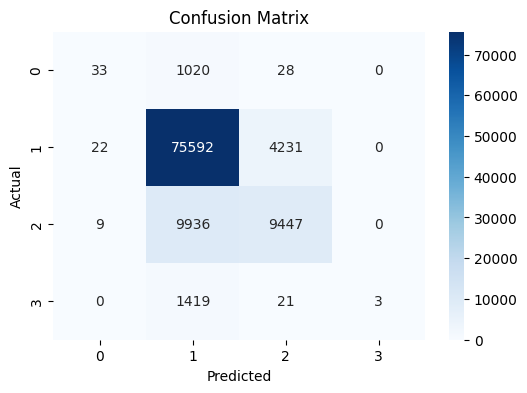

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.03      0.06      1081
           1       0.86      0.95      0.90     79845
           2       0.69      0.49      0.57     19392
           3       1.00      0.00      0.00      1443

    accuracy                           0.84    101761
   macro avg       0.77      0.37      0.38    101761
weighted avg       0.83      0.84      0.82    101761



In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_test, y_pred, zero_division=0)
print("Classification Report:")
print(class_report)

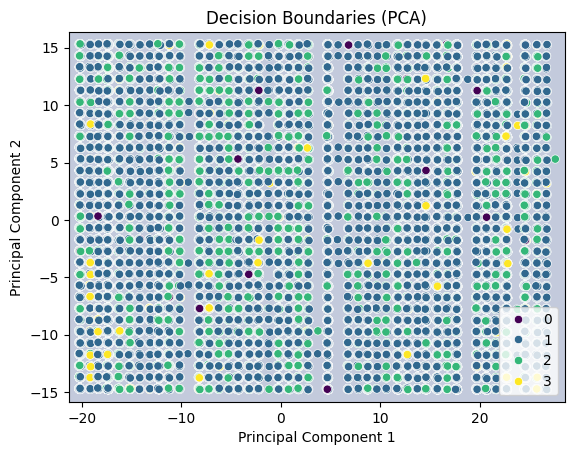

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA

# Read the data
X_train_df = pd.read_csv("X_train.csv")
y_train_df = pd.read_csv("y_train.csv")
X_test_df = pd.read_csv("X_test.csv")
y_test_df = pd.read_csv("y_test.csv")

X_train = X_train_df.values
X_test = X_test_df.values
y_train = y_train_df["Severity"]
y_test = y_test_df["Severity"]

# Plot decision boundaries using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Fit logistic regression model on reduced data
logreg_lbfgs_pca = LogisticRegression(multi_class='auto', solver='lbfgs', max_iter=250000)
logreg_lbfgs_pca.fit(X_train_pca, y_train)

# Create a mesh grid to plot decision boundaries
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = logreg_lbfgs_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries and scatter plot
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette='viridis', legend='full')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundaries (PCA)')
plt.legend(loc='lower right')
plt.show()


# Solver = newton-cg, default

In [ ]:
import numpy as np
import pandas as pd
from math import ceil
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,f1_score, accuracy_score,confusion_matrix,classification_report

In [ ]:
X_train_df = pd.read_csv("X_train.csv")
y_train_df = pd.read_csv("y_train.csv")
X_test_df = pd.read_csv("X_test.csv")
y_test_df = pd.read_csv("y_test.csv")

X_train = X_train_df.values
X_test = X_test_df.values
y_train = y_train_df["Severity"]
y_test = y_test_df["Severity"]

In [ ]:
# Initialize the Logistic Regression model with adjusted hyperparameters
logreg_ncg = LogisticRegression(multi_class='auto', solver='newton-cg', max_iter=250000)

# Train the model on the scaled training data
logreg_ncg.fit(X_train, y_train)

LogisticRegression(max_iter=250000, solver='newton-cg')

In [ ]:
def classification_task( model,X_train_scaled, y_train ,X_test_scaled ,y_test, predic,model_name):

    perf_df=pd.DataFrame({'Train_Score':model.score(X_train_scaled,y_train),"Test_Score":model.score(X_test_scaled,y_test),
                       "Precision_Score":precision_score(y_test,predic,average='weighted'),"Recall_Score":recall_score(y_test,predic,average='weighted'),
                       "F1_Score":f1_score(y_test,predic,average='weighted') , "accuracy":accuracy_score(y_test,predic)}, index=[model_name])
    return perf_df

In [ ]:
y_pred = logreg_ncg.predict(X_test)

Eval_logreg_ncg =classification_task(logreg_ncg, X_train, y_train ,X_test, y_test, y_pred,'Log Reg newton-cg')
Eval_logreg_ncg

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
Log Reg newton-cg,0.836869,0.836047,0.825149,0.836047,0.816316,0.836047


Accuracy: 0.84


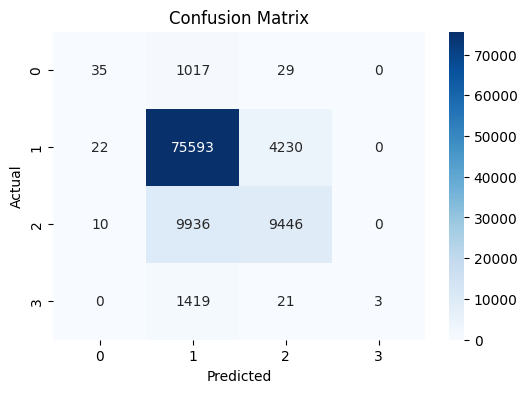

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.03      0.06      1081
           1       0.86      0.95      0.90     79845
           2       0.69      0.49      0.57     19392
           3       1.00      0.00      0.00      1443

    accuracy                           0.84    101761
   macro avg       0.77      0.37      0.38    101761
weighted avg       0.83      0.84      0.82    101761



In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_test, y_pred, zero_division=0)
print("Classification Report:")
print(class_report)

# Solver = sag, default

In [ ]:
import numpy as np
import pandas as pd
from math import ceil
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,f1_score, accuracy_score,confusion_matrix,classification_report

In [ ]:
X_train_df = pd.read_csv("X_train.csv")
y_train_df = pd.read_csv("y_train.csv")
X_test_df = pd.read_csv("X_test.csv")
y_test_df = pd.read_csv("y_test.csv")

X_train = X_train_df.values
X_test = X_test_df.values
y_train = y_train_df["Severity"]
y_test = y_test_df["Severity"]

In [ ]:
# Initialize the Logistic Regression model with adjusted hyperparameters
logreg_sag = LogisticRegression(multi_class='auto', solver='sag', max_iter=250000)

# Train the model on the scaled training data
logreg_sag.fit(X_train, y_train)

LogisticRegression(max_iter=250000, solver='sag')

In [ ]:
def classification_task( model,X_train_scaled, y_train ,X_test_scaled ,y_test, predic,model_name):

    perf_df=pd.DataFrame({'Train_Score':model.score(X_train_scaled,y_train),"Test_Score":model.score(X_test_scaled,y_test),
                       "Precision_Score":precision_score(y_test,predic,average='weighted'),"Recall_Score":recall_score(y_test,predic,average='weighted'),
                       "F1_Score":f1_score(y_test,predic,average='weighted') , "accuracy":accuracy_score(y_test,predic)}, index=[model_name])
    return perf_df

In [ ]:
y_pred = logreg_sag.predict(X_test)

Eval_logreg_sag =classification_task(logreg_sag, X_train, y_train ,X_test, y_test, y_pred,'Log Reg')
Eval_logreg_sag

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
Log Reg,0.836844,0.836028,0.824977,0.836028,0.816259,0.836028


Accuracy: 0.84


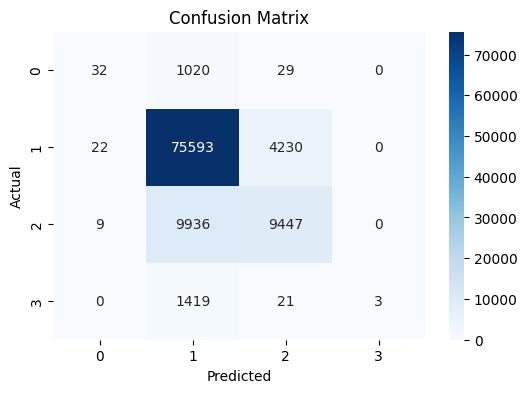

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.03      0.06      1081
           1       0.86      0.95      0.90     79845
           2       0.69      0.49      0.57     19392
           3       1.00      0.00      0.00      1443

    accuracy                           0.84    101761
   macro avg       0.76      0.37      0.38    101761
weighted avg       0.82      0.84      0.82    101761



In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_test, y_pred, zero_division=0)
print("Classification Report:")
print(class_report)

# Solver = saga, default

In [ ]:
import numpy as np
import pandas as pd
from math import ceil
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score,recall_score,f1_score, accuracy_score,confusion_matrix,classification_report

In [ ]:
X_train_df = pd.read_csv("X_train.csv")
y_train_df = pd.read_csv("y_train.csv")
X_test_df = pd.read_csv("X_test.csv")
y_test_df = pd.read_csv("y_test.csv")

X_train = X_train_df.values
X_test = X_test_df.values
y_train = y_train_df["Severity"]
y_test = y_test_df["Severity"]

In [ ]:
# Initialize the Logistic Regression model with adjusted hyperparameters
logreg_saga = LogisticRegression(multi_class='auto', solver='saga', max_iter=250000)

# Train the model on the scaled training data
logreg_saga.fit(X_train, y_train)

LogisticRegression(max_iter=250000, solver='saga')

In [ ]:
def classification_task( model,X_train_scaled, y_train ,X_test_scaled ,y_test, predic,model_name):

    perf_df=pd.DataFrame({'Train_Score':model.score(X_train_scaled,y_train),"Test_Score":model.score(X_test_scaled,y_test),
                       "Precision_Score":precision_score(y_test,predic,average='weighted'),"Recall_Score":recall_score(y_test,predic,average='weighted'),
                       "F1_Score":f1_score(y_test,predic,average='weighted') , "accuracy":accuracy_score(y_test,predic)}, index=[model_name])
    return perf_df

In [ ]:
y_pred = logreg_saga.predict(X_test)

Eval_logreg_saga =classification_task(logreg_saga, X_train, y_train ,X_test, y_test, y_pred,'Log Reg')
Eval_logreg_saga

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
Log Reg,0.836823,0.835969,0.824573,0.835969,0.816137,0.835969


Accuracy: 0.84


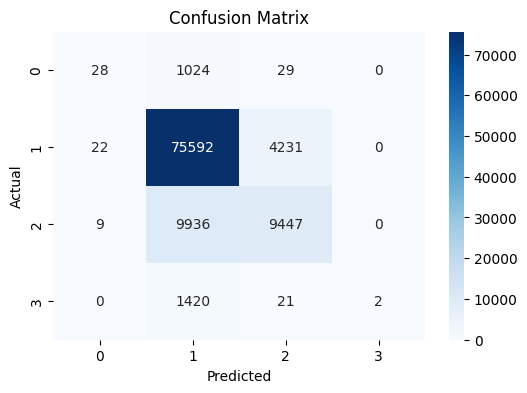

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.03      0.05      1081
           1       0.86      0.95      0.90     79845
           2       0.69      0.49      0.57     19392
           3       1.00      0.00      0.00      1443

    accuracy                           0.84    101761
   macro avg       0.76      0.37      0.38    101761
weighted avg       0.82      0.84      0.82    101761



In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_test, y_pred, zero_division=0)
print("Classification Report:")
print(class_report)

# Elastic Net, Solver = Saga, l1_ratio = 0.25

In [ ]:
import numpy as np
import pandas as pd
from math import ceil
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,f1_score, accuracy_score,confusion_matrix,classification_report

In [ ]:
X_train_df = pd.read_csv("X_train.csv")
y_train_df = pd.read_csv("y_train.csv")
X_test_df = pd.read_csv("X_test.csv")
y_test_df = pd.read_csv("y_test.csv")

X_train = X_train_df.values
X_test = X_test_df.values
y_train = y_train_df["Severity"]
y_test = y_test_df["Severity"]

In [ ]:
# Initialize the Logistic Regression model with adjusted hyperparameters
logreg_en_a = LogisticRegression(penalty='elasticnet', C=1.0, multi_class='auto', solver='saga', max_iter=250000, l1_ratio=0.25)

# Train the model on the scaled training data
logreg_en_a.fit(X_train, y_train)

LogisticRegression(l1_ratio=0.25, max_iter=250000, penalty='elasticnet',
                   solver='saga')

In [ ]:
def classification_task( model,X_train_scaled, y_train ,X_test_scaled ,y_test, predic,model_name):

    perf_df=pd.DataFrame({'Train_Score':model.score(X_train_scaled,y_train),"Test_Score":model.score(X_test_scaled,y_test),
                       "Precision_Score":precision_score(y_test,predic,average='weighted'),"Recall_Score":recall_score(y_test,predic,average='weighted'),
                       "F1_Score":f1_score(y_test,predic,average='weighted') , "accuracy":accuracy_score(y_test,predic)}, index=[model_name])
    return perf_df

In [ ]:
y_pred = logreg_en_a.predict(X_test)

Eval_logreg_en_a =classification_task(logreg_en_a, X_train, y_train ,X_test, y_test, y_pred,'Log Reg')
Eval_logreg_en_a

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
Log Reg,0.836814,0.835978,0.824584,0.835978,0.816145,0.835978


Accuracy: 0.84


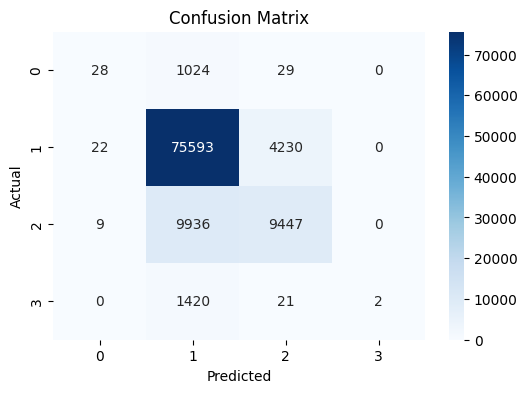

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.03      0.05      1081
           1       0.86      0.95      0.90     79845
           2       0.69      0.49      0.57     19392
           3       1.00      0.00      0.00      1443

    accuracy                           0.84    101761
   macro avg       0.76      0.37      0.38    101761
weighted avg       0.82      0.84      0.82    101761



In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_test, y_pred, zero_division=0)
print("Classification Report:")
print(class_report)

# Elastic Net, Solver = saga, l1_ratio = 0.5

In [ ]:
import numpy as np
import pandas as pd
from math import ceil
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,f1_score, accuracy_score,confusion_matrix,classification_report

In [ ]:
X_train_df = pd.read_csv("X_train.csv")
y_train_df = pd.read_csv("y_train.csv")
X_test_df = pd.read_csv("X_test.csv")
y_test_df = pd.read_csv("y_test.csv")

X_train = X_train_df.values
X_test = X_test_df.values
y_train = y_train_df["Severity"]
y_test = y_test_df["Severity"]

In [ ]:
# Initialize the Logistic Regression model with adjusted hyperparameters
logreg_en_b = LogisticRegression(penalty='elasticnet', C=1.0, multi_class='auto', solver='saga', max_iter=250000, l1_ratio=0.5)

# Train the model on the scaled training data
logreg_en_b.fit(X_train, y_train)

LogisticRegression(l1_ratio=0.5, max_iter=250000, penalty='elasticnet',
                   solver='saga')

In [ ]:
def classification_task( model,X_train_scaled, y_train ,X_test_scaled ,y_test, predic,model_name):

    perf_df=pd.DataFrame({'Train_Score':model.score(X_train_scaled,y_train),"Test_Score":model.score(X_test_scaled,y_test),
                       "Precision_Score":precision_score(y_test,predic,average='weighted'),"Recall_Score":recall_score(y_test,predic,average='weighted'),
                       "F1_Score":f1_score(y_test,predic,average='weighted') , "accuracy":accuracy_score(y_test,predic)}, index=[model_name])
    return perf_df

In [ ]:
y_pred = logreg_en_b.predict(X_test)

Eval_logreg_en_b =classification_task(logreg_en_b, X_train, y_train ,X_test, y_test, y_pred,'Log Reg')
Eval_logreg_en_b

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
Log Reg,0.836818,0.835978,0.824584,0.835978,0.816145,0.835978


Accuracy: 0.84


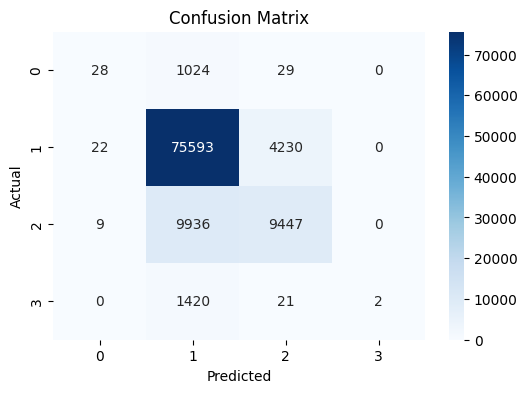

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.03      0.05      1081
           1       0.86      0.95      0.90     79845
           2       0.69      0.49      0.57     19392
           3       1.00      0.00      0.00      1443

    accuracy                           0.84    101761
   macro avg       0.76      0.37      0.38    101761
weighted avg       0.82      0.84      0.82    101761



In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_test, y_pred, zero_division=0)
print("Classification Report:")
print(class_report)

# Elastic Net, Solver = Saga, l1_ratio = 0.75

In [1]:
import numpy as np
import pandas as pd
from math import ceil
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,f1_score, accuracy_score,confusion_matrix,classification_report

In [2]:
X_train_df = pd.read_csv("X_train.csv")
y_train_df = pd.read_csv("y_train.csv")
X_test_df = pd.read_csv("X_test.csv")
y_test_df = pd.read_csv("y_test.csv")

X_train = X_train_df.values
X_test = X_test_df.values
y_train = y_train_df["Severity"]
y_test = y_test_df["Severity"]

In [3]:
# Initialize the Logistic Regression model with adjusted hyperparameters
logreg_en_c = LogisticRegression(penalty='elasticnet', C=1.0, multi_class='auto', solver='saga', max_iter=250000, l1_ratio=0.75)

# Train the model on the scaled training data
logreg_en_c.fit(X_train, y_train)

LogisticRegression(l1_ratio=0.75, max_iter=250000, penalty='elasticnet',
                   solver='saga')

In [4]:
def classification_task( model,X_train_scaled, y_train ,X_test_scaled ,y_test, predic,model_name):

    perf_df=pd.DataFrame({'Train_Score':model.score(X_train_scaled,y_train),"Test_Score":model.score(X_test_scaled,y_test),
                       "Precision_Score":precision_score(y_test,predic,average='weighted'),"Recall_Score":recall_score(y_test,predic,average='weighted'),
                       "F1_Score":f1_score(y_test,predic,average='weighted') , "accuracy":accuracy_score(y_test,predic)}, index=[model_name])
    return perf_df

In [5]:
y_pred = logreg_en_c.predict(X_test)

Eval_logreg_en_c =classification_task(logreg_en_c, X_train, y_train ,X_test, y_test, y_pred,'Log Reg')
Eval_logreg_en_c

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
Log Reg,0.836814,0.835998,0.824686,0.835998,0.816163,0.835998


Accuracy: 0.84


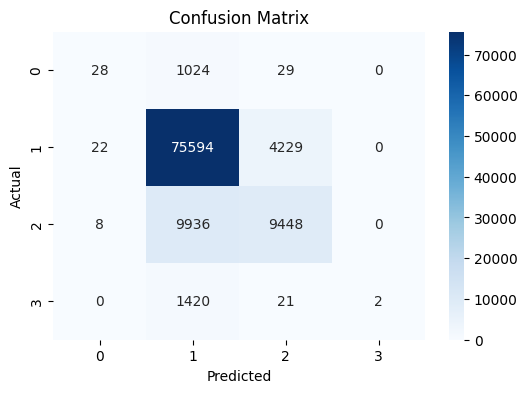

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.03      0.05      1081
           1       0.86      0.95      0.90     79845
           2       0.69      0.49      0.57     19392
           3       1.00      0.00      0.00      1443

    accuracy                           0.84    101761
   macro avg       0.76      0.37      0.38    101761
weighted avg       0.82      0.84      0.82    101761



In [6]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_test, y_pred, zero_division=0)
print("Classification Report:")
print(class_report)

# Elastic Net, Solver = Saga, l1_ratio = 1

In [7]:
import numpy as np
import pandas as pd
from math import ceil
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,f1_score, accuracy_score,confusion_matrix,classification_report

In [8]:
X_train_df = pd.read_csv("X_train.csv")
y_train_df = pd.read_csv("y_train.csv")
X_test_df = pd.read_csv("X_test.csv")
y_test_df = pd.read_csv("y_test.csv")

X_train = X_train_df.values
X_test = X_test_df.values
y_train = y_train_df["Severity"]
y_test = y_test_df["Severity"]

In [9]:
# Initialize the Logistic Regression model with adjusted hyperparameters
logreg_en_d = LogisticRegression(penalty='elasticnet', C=1.0, multi_class='auto', solver='saga', max_iter=250000, l1_ratio=1)

# Train the model on the scaled training data
logreg_en_d.fit(X_train, y_train)

LogisticRegression(l1_ratio=1, max_iter=250000, penalty='elasticnet',
                   solver='saga')

In [10]:
def classification_task( model,X_train_scaled, y_train ,X_test_scaled ,y_test, predic,model_name):

    perf_df=pd.DataFrame({'Train_Score':model.score(X_train_scaled,y_train),"Test_Score":model.score(X_test_scaled,y_test),
                       "Precision_Score":precision_score(y_test,predic,average='weighted'),"Recall_Score":recall_score(y_test,predic,average='weighted'),
                       "F1_Score":f1_score(y_test,predic,average='weighted') , "accuracy":accuracy_score(y_test,predic)}, index=[model_name])
    return perf_df

In [11]:
y_pred = logreg_en_d.predict(X_test)

Eval_logreg_en_d =classification_task(logreg_en_d, X_train, y_train ,X_test, y_test, y_pred,'Log Reg')
Eval_logreg_en_d

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
Log Reg,0.836818,0.835988,0.824674,0.835988,0.81615,0.835988


Accuracy: 0.84


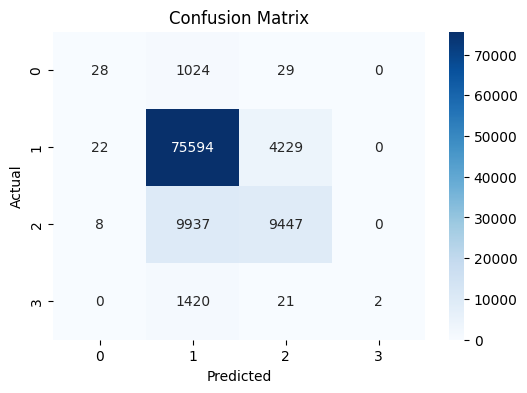

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.03      0.05      1081
           1       0.86      0.95      0.90     79845
           2       0.69      0.49      0.57     19392
           3       1.00      0.00      0.00      1443

    accuracy                           0.84    101761
   macro avg       0.76      0.37      0.38    101761
weighted avg       0.82      0.84      0.82    101761



In [12]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_test, y_pred, zero_division=0)
print("Classification Report:")
print(class_report)

# Balanced, solver = lbfgs

In [15]:
import numpy as np
import pandas as pd
from math import ceil
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,f1_score, accuracy_score,confusion_matrix,classification_report

In [16]:
X_train_df = pd.read_csv("X_train.csv")
y_train_df = pd.read_csv("y_train.csv")
X_test_df = pd.read_csv("X_test.csv")
y_test_df = pd.read_csv("y_test.csv")

X_train = X_train_df.values
X_test = X_test_df.values
y_train = y_train_df["Severity"]
y_test = y_test_df["Severity"]

In [17]:
# Initialize the Logistic Regression model with adjusted hyperparameters
logreg_bal = LogisticRegression(class_weight= 'balanced', multi_class='auto', solver='lbfgs', max_iter=250000)

# Train the model on the scaled training data
logreg_bal.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=250000)

In [18]:
def classification_task( model,X_train_scaled, y_train ,X_test_scaled ,y_test, predic,model_name):

    perf_df=pd.DataFrame({'Train_Score':model.score(X_train_scaled,y_train),"Test_Score":model.score(X_test_scaled,y_test),
                       "Precision_Score":precision_score(y_test,predic,average='weighted'),"Recall_Score":recall_score(y_test,predic,average='weighted'),
                       "F1_Score":f1_score(y_test,predic,average='weighted') , "accuracy":accuracy_score(y_test,predic)}, index=[model_name])
    return perf_df

In [19]:
y_pred = logreg_bal.predict(X_test)

Eval_logreg_bal =classification_task(logreg_bal, X_train, y_train ,X_test, y_test, y_pred,'Log Reg')
Eval_logreg_bal

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
Log Reg,0.502596,0.500909,0.828556,0.500909,0.572757,0.500909


Accuracy: 0.50


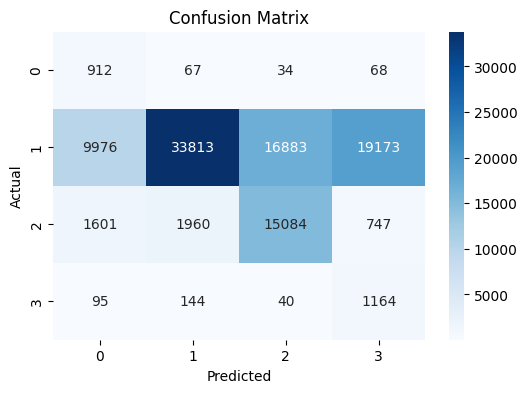

Classification Report:
              precision    recall  f1-score   support

           0       0.07      0.84      0.13      1081
           1       0.94      0.42      0.58     79845
           2       0.47      0.78      0.59     19392
           3       0.06      0.81      0.10      1443

    accuracy                           0.50    101761
   macro avg       0.38      0.71      0.35    101761
weighted avg       0.83      0.50      0.57    101761



In [20]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_test, y_pred, zero_division=0)
print("Classification Report:")
print(class_report)

# Elastic Net, balanced, solver = saga

In [21]:
import numpy as np
import pandas as pd
from math import ceil
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,f1_score, accuracy_score,confusion_matrix,classification_report

In [22]:
X_train_df = pd.read_csv("X_train.csv")
y_train_df = pd.read_csv("y_train.csv")
X_test_df = pd.read_csv("X_test.csv")
y_test_df = pd.read_csv("y_test.csv")

X_train = X_train_df.values
X_test = X_test_df.values
y_train = y_train_df["Severity"]
y_test = y_test_df["Severity"]

In [23]:
# Initialize the Logistic Regression model with adjusted hyperparameters
logreg_en_bal = LogisticRegression(penalty = 'elasticnet', class_weight = 'balanced', C = 1.0, multi_class='auto', solver='saga', max_iter=250000, l1_ratio = 0.5)

# Train the model on the scaled training data
logreg_en_bal.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', l1_ratio=0.5, max_iter=250000,
                   penalty='elasticnet', solver='saga')

In [24]:
def classification_task( model,X_train_scaled, y_train ,X_test_scaled ,y_test, predic,model_name):

    perf_df=pd.DataFrame({'Train_Score':model.score(X_train_scaled,y_train),"Test_Score":model.score(X_test_scaled,y_test),
                       "Precision_Score":precision_score(y_test,predic,average='weighted'),"Recall_Score":recall_score(y_test,predic,average='weighted'),
                       "F1_Score":f1_score(y_test,predic,average='weighted') , "accuracy":accuracy_score(y_test,predic)}, index=[model_name])
    return perf_df

In [25]:
y_pred = logreg_en_bal.predict(X_test)

Eval_logreg_en_bal =classification_task(logreg_en_bal, X_train, y_train ,X_test, y_test, y_pred,'Log Reg')
Eval_logreg_en_bal

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
Log Reg,0.502504,0.50088,0.828486,0.50088,0.572736,0.50088


Accuracy: 0.50


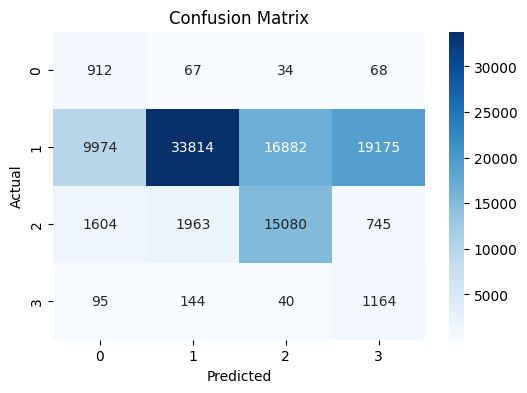

Classification Report:
              precision    recall  f1-score   support

           0       0.07      0.84      0.13      1081
           1       0.94      0.42      0.58     79845
           2       0.47      0.78      0.59     19392
           3       0.06      0.81      0.10      1443

    accuracy                           0.50    101761
   macro avg       0.38      0.71      0.35    101761
weighted avg       0.83      0.50      0.57    101761



In [26]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_test, y_pred, zero_division=0)
print("Classification Report:")
print(class_report)

# OvR, solver = liblinear

In [1]:
import numpy as np
import pandas as pd
from math import ceil
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,f1_score, accuracy_score,confusion_matrix,classification_report

In [2]:
X_train_df = pd.read_csv("X_train.csv")
y_train_df = pd.read_csv("y_train.csv")
X_test_df = pd.read_csv("X_test.csv")
y_test_df = pd.read_csv("y_test.csv")

X_train = X_train_df.values
X_test = X_test_df.values
y_train = y_train_df["Severity"]
y_test = y_test_df["Severity"]

In [7]:
# Initialize the Logistic Regression model with adjusted hyperparameters
logreg_nc = LogisticRegression(multi_class='ovr', solver='liblinear', max_iter=250000)

# Train the model on the scaled training data
logreg_nc.fit(X_train, y_train)

LogisticRegression(max_iter=250000, multi_class='ovr', solver='liblinear')

In [8]:
def classification_task( model,X_train_scaled, y_train ,X_test_scaled ,y_test, predic,model_name):

    perf_df=pd.DataFrame({'Train_Score':model.score(X_train_scaled,y_train),"Test_Score":model.score(X_test_scaled,y_test),
                       "Precision_Score":precision_score(y_test,predic,average='weighted'),"Recall_Score":recall_score(y_test,predic,average='weighted'),
                       "F1_Score":f1_score(y_test,predic,average='weighted') , "accuracy":accuracy_score(y_test,predic)}, index=[model_name])
    return perf_df

In [9]:
y_pred = logreg_nc.predict(X_test)

Eval_logreg_nc =classification_task(logreg_nc, X_train, y_train ,X_test, y_test, y_pred,'Log Reg')
Eval_logreg_nc

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
Log Reg,0.836882,0.835762,0.804758,0.835762,0.814724,0.835762


Accuracy: 0.84


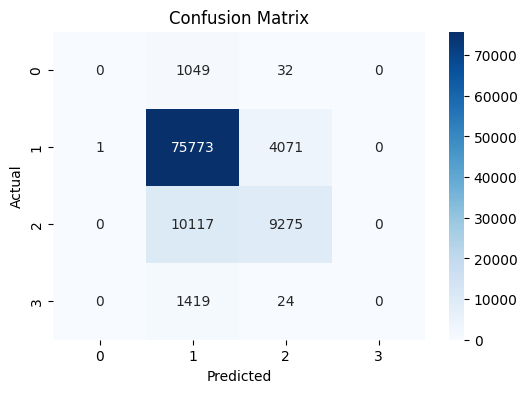

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1081
           1       0.86      0.95      0.90     79845
           2       0.69      0.48      0.57     19392
           3       0.00      0.00      0.00      1443

    accuracy                           0.84    101761
   macro avg       0.39      0.36      0.37    101761
weighted avg       0.80      0.84      0.81    101761



In [10]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_test, y_pred, zero_division=0)
print("Classification Report:")
print(class_report)